In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
sns.set()

In [29]:
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

In [30]:
data = gpd.read_file('C:\\Users\\adith\\Desktop\\neighbourhoods (1).shp')
data.head()

,neighbourh,neighbou_1,geometry
0,78739,None,"POLYGON ((-97.85502 30.17544, -97.85602 30.173..."
1,78754,None,"POLYGON ((-97.60747 30.33465, -97.60910 30.334..."
2,78732,None,"POLYGON ((-97.87303 30.43806, -97.87335 30.436..."
3,78737,None,"POLYGON ((-97.88831 30.22919, -97.88851 30.228..."
4,78756,None,"POLYGON ((-97.72792 30.32906, -97.72760 30.328..."


 MAP OF AUSTIN


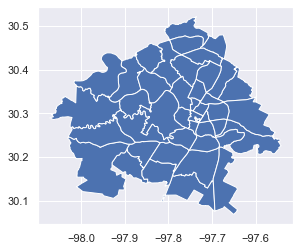

In [54]:
data.plot()

print(' MAP OF AUSTIN')

In [40]:
listings = pd.read_csv('C:\\Users\\adith\\Downloads\\listingsnew.csv' , index_col='id')

listings = listings.drop(columns=['neighbourhood_group'])


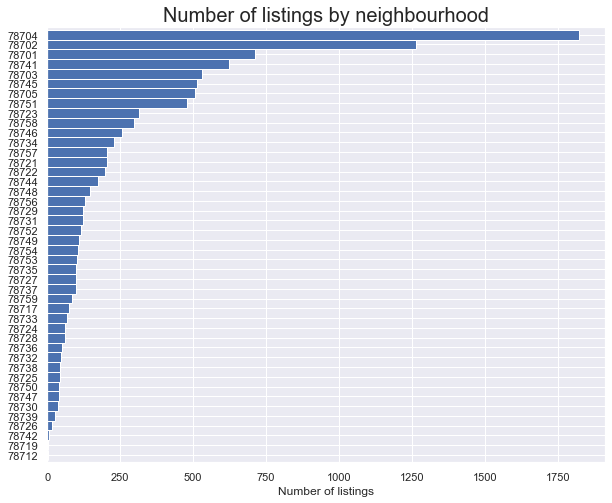

Top 10 Neighbourhoods to Visit based on previous listings


78712     2
78719     4
78742     5
78726    15
78739    25
78730    37
78747    40
78750    41
78725    42
78738    44
Name: neighbourhood, dtype: int64

In [53]:
feq=listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()
print('Top 10 Neighbourhoods to Visit based on previous listings')
feq.head(10)

In [42]:
latitudelist = listings['latitude'].tolist()
longitudelist = listings['longitude'].tolist()
locations = list(zip(latitudelist, longitudelist))
Thematic_map = folium.Map(location=[30.2463, -97.76361], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(Thematic_map)
Thematic_map

In [43]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [44]:
feq = listings[['neighbourhood',"room_type"]]
feq['room_type'] = feq['room_type'].apply(lambda x: x if x == 'Entire home/apt' else "single room")

C:\Users\adith\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


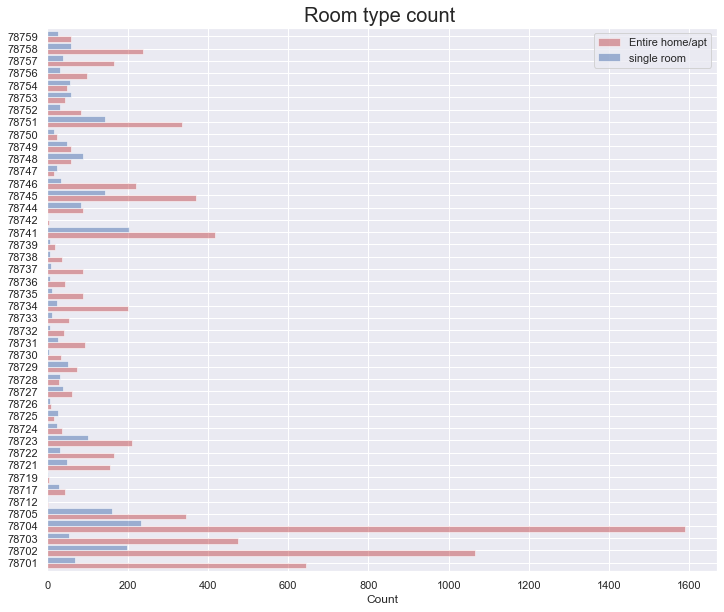

In [45]:
feq = feq.groupby(['neighbourhood',"room_type"])['room_type'].count() \
                  .unstack(fill_value=0)\
                  .rename_axis(None, axis=1)
feq.plot.barh(figsize=(12, 10), color=['r','b'], width=.9,alpha = .5)
plt.title('Room type count ', fontsize=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel("")
plt.show()

In [47]:
top_10 = listings.groupby(['host_id'])['calculated_host_listings_count'].sum().sort_values(ascending = True)[-10:]
top_10[::-1]

host_id
359036978    128164
104309976     17161
109638288      6724
8167447        6561
118565935      3136
346827202      2304
194953121      2025
210733801      1849
368944610      1600
15782486       1444
Name: calculated_host_listings_count, dtype: int64

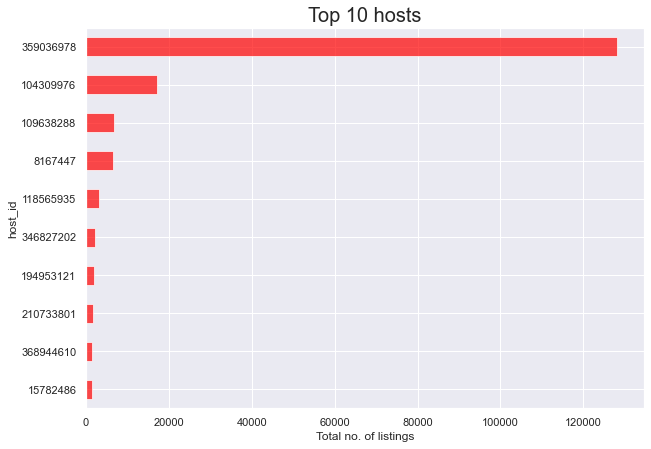

In [51]:
top_10.plot.barh(figsize=(10, 7), color= 'red', alpha = .7,width=.5)
plt.title("Top 10 hosts", fontsize=20)
plt.xlabel('Total no. of listings', fontsize=12)
plt.show()